
**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

In [ ]:
#Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [3]:
train_set_x_orig, train_set_y ,test_set_x_orig, test_set_y , classes = load_dataset()

In [ ]:
#Why classes
#Why load_dataset()?: Becasue the function name is load_dataset()
#其實還是不懂為啥要h5
#這邊先不用管load_dataset裡面裝什麼

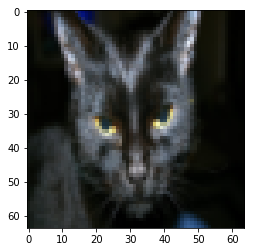

In [10]:
index = 25
plt.imshow(train_set_x_orig[index])

In [11]:
#先看一隻貓咪～看看而已

In [21]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [ ]:
#先看看train_set長什麼樣子呀～你會知道總共有209張，64x64 pixels，3是RBG顏色的意思。

In [28]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

print ("Number of training examples: m_train= " + str(m_train))
print ("Number of testing examples: m_test =" + str(m_test))
print ("Height/Width of each image: num_px =" + str(num_px))
print(str(train_set_x_orig.shape))
print(str(train_set_y.shape))
print(str(test_set_x_orig.shape))
print(str(test_set_y.shape))

Number of training examples: m_train= 209
Number of testing examples: m_test =50
Height/Width of each image: num_px =64
(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


In [29]:
#看看你要訓練的data長什麼樣子

In [ ]:
#這邊是依照公式

In [32]:
train_set_x_flatten = train_set_x_orig.reshape(m_train,-1).T

In [34]:
train_set_x_flatten.shape

(12288, 209)

In [36]:
# 打開來看看，你會發現是把64*64*3乘起來

In [37]:
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

In [38]:
train_set_x = train_set_x_flatten/255.
test_set_x =test_set_x_flatten/255.

In [39]:
#Standardize , 255 is the max of a pixel channel

In [40]:
def sigmoid(z):
    s =1/(1+np.exp(-z))
    return s

In [50]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b =0
    assert(w.shape ==(dim ,1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [51]:
# zeros裡面要再用一組()

In [52]:
dim = 2
w, b = initialize_with_zeros(dim)

In [55]:
print(str(w))
print(str((b)))

[[ 0.]
 [ 0.]]
0


In [76]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -(1.0/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape ==w.shape)
    assert(db.dtype == float)
    cost=np.squeeze(cost)
    assert(cost.shape ==())
    
    grads={"dw": dw,"db" : db}
    
    return grads, cost

In [77]:
w, b, X, Y =np.array([[1],[2]]) ,2 ,np.array([[1.,2.,-1.],[3,4,-3.2]]), np.array([[1,0,1]])

In [78]:
grads, cost =propagate(w,b,X, Y)

In [82]:
print(str(grads["dw"]))
print(str(grads["db"]))
print(str(cost))

[[ 0.99845601]
 [ 2.39507239]]
0.00145557813678
5.80154531939


In [161]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        
        grads ,cost = propagate(w, b ,X ,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 ==0:
            costs.append(cost)
                
        if print_cost and i % 100== 0:
            print("Cost after iteration %i:%f"%(i,cost))
    params = {"w": w,"b":b}
    
    grads ={"dw":dw,"db":db}
    return params,grads, costs

In [162]:
# %i %f 是一種表示技巧
#for loop 記得＋in

In [163]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)


In [164]:
#為什麼又來一組grads?

In [165]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w =w.reshape(X.shape[0], 1)
    
    A =sigmoid(np.dot(w.T , X)+b)
    
    for i in range(A.shape[1]):
        
        if A[0,i] >0.5:
            Y_prediction[0,i] =1
        else:
            Y_prediction[0,i] =0
    assert(Y_prediction.shape ==(1,m))
    
    return Y_prediction 

In [166]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1,-1,-3],[1.2,2,0.1]])
print(str(predict(w,b,X)))

[[ 1.  1.  0.]]


In [167]:
def model(X_train, Y_train, X_test,Y_test, num_iterations = 2000 ,learning_rate=0.5, print_cost=False):
    
    w,b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads ,costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train) 
    
    print("train accuracy:{}%".format(100 - np.mean(np.abs(Y_prediction_train- Y_train))*100))
    print("test accuracy {}%".format(100 - np.mean(np.abs(Y_prediction_test -Y_test))*100))
    
    d = {"costs":costs,
        "Y_prediction_test":Y_prediction_test,
        "Y_prediction_train":Y_prediction_train,
        "w":w,
        "b":b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations}
    return d
    

In [168]:
d = model(train_set_x, train_set_y, test_set_x,test_set_y ,num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0:0.693147
Cost after iteration 100:0.584508
Cost after iteration 200:0.466949
Cost after iteration 300:0.376007
Cost after iteration 400:0.331463
Cost after iteration 500:0.303273
Cost after iteration 600:0.279880
Cost after iteration 700:0.260042
Cost after iteration 800:0.242941
Cost after iteration 900:0.228004
Cost after iteration 1000:0.214820
Cost after iteration 1100:0.203078
Cost after iteration 1200:0.192544
Cost after iteration 1300:0.183033
Cost after iteration 1400:0.174399
Cost after iteration 1500:0.166521
Cost after iteration 1600:0.159305
Cost after iteration 1700:0.152667
Cost after iteration 1800:0.146542
Cost after iteration 1900:0.140872
train accuracy:99.04306220095694%
test accuracy 70.0%


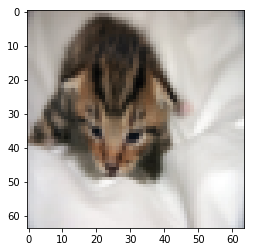

In [169]:
index=1 
plt.imshow(test_set_x[:,index].reshape((num_px, num_px,3)))

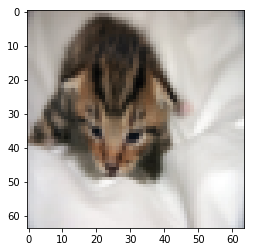

In [170]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

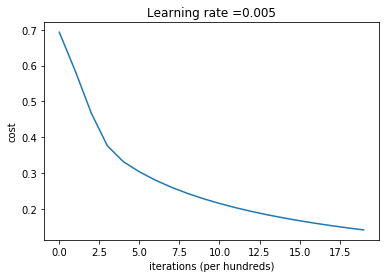

In [171]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()